# RSA - Computeroefening

Naam: Ferre Van der Vieren (r0851455)

Dit eerste practicum gaat over RSA. Het is echter nog steeds de bedoeling dat je alles wat hier geprogrammeerd zal worden ook met de hand en rekenmachine kan uitrekenen, maar vaak verkrijg je pas echt inzicht in een probleem als je het eens zelf implementeert. Het is dus sterk aangeraden zelf goed na te denken over wat je programmeert. Om jullie op weg te helpen is telkens de signatuur van de methodes gegeven, gelieve deze niet te veranderen. Je mag uiteraard zelf hulpmethodes en comments invoegen om je code duidelijker te maken. Er wordt af en toe gevraagd een antwoord aan te vullen in de notebook, het is overzichtelijker om dit in kleur te doen. 

## Modulaire exponentiatie

Voor het XS binair algoritme is de binaire voorstelling van een de exponent nodig. Vul de code in de onderstaande methode aan zodat de methode een lijst met enen en nullen terug geeft, die een binaire voorstelling van b is. De bit behorende bij de laagste macht van 2 staat vanvoor in de lijst en de bit behorende bij de hoogste macht van 2 staat vanachter.

In [77]:
def bits(b):
    bits = []
    
    n = b
    while n != 0:
        bit = n % 2
        bits.append(bit)
        n = n // 2
        
    return bits

Vul de onderstaande methode verder aan zodat het XS binair algoritme wordt geimplementeerd. Het resultaat is $r = a^b \mod{m}$.

In [78]:
def mod_exp(a, b, m):
    r = 1
    
    exp_bits = bits(b)
    for i in range(len(exp_bits)-1, 0, -1):
        if exp_bits[i] == 1:
            r = (r*a)%m
        r = (r*r)%m
    if exp_bits[0] == 1:
        r = (r*a)%m
    
    return r

Vergelijk de snelheid van je implementatie met de naı̈ve en ingebouwde implementatie van
modulaire exponentiatie in python. (Hint: $\texttt{pow}$) Het resultaat is een mooie staafdiagram met drie staven met op de x-as de naam van de methode en op de y-as de snelheid in zelfgekozen eenheden.

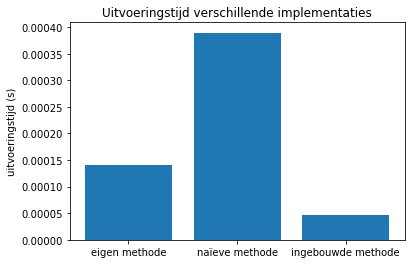

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

# genereer willekeurige getallen
a = int(np.random.randint(1000, 5000, 1))
b = int(np.random.randint(1000, 5000, 1))
m = int(np.random.randint(20000, 200000, 1))

# test methodes op getallen
# eigen implementatie
start = timer()
mod_exp(a, b, m)
end = timer()
res1 = end - start

# naïeve implementatie
start = timer()
a**b % m
end = timer()
res2 = end - start

# ingebouwde implementatie
start = timer()
pow(a, b, m)
end = timer()
res3 = end - start

# plot resultaten
x_axis = np.array(["eigen methode", "naïeve methode", "ingebouwde methode"])
y_axis = np.array([res1, res2, res3])
plt.bar(x_axis, y_axis)
plt.ylabel("uitvoeringstijd (s)")
plt.title("Uitvoeringstijd verschillende implementaties")
plt.show()

In hoogstens een paar zinnen, leg kort uit waarom je deze resultaten kan verwachten.

**Antwoord**: De naïeve methode duurt logischerwijs het langst, aangezien deze niet gebruik maakt van eigenschappen van modulorekenen met machten; we berekenen eerst de macht en dan pas de modulo van de resulterende macht. De eigen implementatie incorporeert dit modulorekenen met machten wel aan de hand van het XS binair algoritme, waardoor het significant sneller is dan de naïeve methode. De ingebouwde methode is uiteindelijk toch iets sneller, wat te wijden is aan de enorm grote optimalisatie dat de Python developers gebruiken bij ingebouwde methodes. Het is dan ook een positief gegeven dat onze eigen implemenatie zo dicht komt bij een dergelijk rigoureuze geoptimaliseerde (ingebouwde) methode.

## Pseudopriemtesten

Met een paar kleine aanpassingen kan je het XS binair algoritme gebruiken voor de sterke priemtest. Vul onderstaande methodes aan zodat de modulaire exponentiatie de sequentie van tussenstappen weergeeft. En zodat de methode strong_pseudoprime(a, m) deze sequentie inspecteert en de waarde True teruggeeft als het getal m slaagt voor de sterke a-pseudopriemtest.

In [167]:
def  mod_exp_seq(a, b, m):
    seq = [1]
    r = 1
    exp_bits = bits(b)
    
    for i in range(len(exp_bits)-1, 0, -1):
        if exp_bits[i] == 1:
            r = (r*a)%m
            seq.append(r)
        r = (r*r)%m
        seq.append(r)
        
    if exp_bits[0] == 1:
        r = (r*a)%m
        seq.append(r)
    
    return seq

def strong_pseudoprime(a, m): 
    seq = mod_exp_seq(a, m - 1, m)

    if (seq[len(seq)-1]) != 1:
        return False  # case (...b)
    
    for num in reversed(seq):
        if num != 1:
            if num != (m-1):   # m-1 = -1
                return False   # case (...,b,1,...,1)
            else:
                return True    # case (...,-1,1,...,1)
            
    return True  # case (1,1,...,1)

In [168]:
print(strong_pseudoprime(2, 257))
print(strong_pseudoprime(2, 561))
print(strong_pseudoprime(2, 287))

True
False
False


In max. 1 zin per getal, wat kunnen we concluderen over de getallen uit bovenstaande getallen?

**Antwoord**: Het getal 256 slaagt voor de sterke 2-priemtest (case 2), en is dus waarschijnlijk een priemgetal (we kunnen dit echter niet met volledige zekerheid besluiten!). De getallen 561 en 287 slagen beide niet voor de sterke 2-priemtest (case 3 en 4 respectievelijk), en zijn dus zeker geen priemgetallen. 

## RSA

Bij RSA worden boodschappen niet noodzakelijk letter per letter vercijferd, maar in blokken van zo groot mogelijke
woorden. Dit kan op verschillende manieren verkregen worden. Hier gebeurt dit bijvoorbeeld door verschillende numerieke waarden aan elkaar te plakken, ZZ wordt dan 2626. Het gebruikte alfabet is hieronder weergegeven.


|_|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|   0  | 1 | 2| 3| 4| 5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|


Implementeer eerst een methode die op basis van de modulus bepaalt hoe lang de woorden zijn.

In [165]:
def length(m):
    temp = 0
    leng = 0
    
    while temp <= m:
        temp = int(str(temp) + str(26))  # add 26 to the end of the size of temp
        leng += 1
    return leng - 1

Vul nu de volgden methode aan zodat de boodschap vercijferd wordt met de RSA methode. Het resultaat is een lijst met gehele getallen modulo $p\cdot q$. 

In [135]:
def to_number(letter):
    # use UNICODE alphabet
    if letter != '': # no space
        return ord(letter) - 96
    else:
        return 0
        
def encrypt(message, e, p, q):
    result = []
    leng = length(p*q)
    
    for i in range(0, len(message), leng):
        c = mod_exp(to_number(message[i:i+leng]), e, p*q)
        result.append(c)
    return result

Om een boodschap te ontcijferen moet je ongeveer hetzelfde doen. Vul onderstaande methode verder aan zodat je een enkele string met de originele boodschap krijgt.

In [154]:
def to_letter(number):
    # use UNICODE alphabet
    if (number != 0): # no space
        return chr(96+number)
    else:
        return ' '
    
def decrypt(message, d, p, q):
    res = ''
    
    # make sure leading zeroes are added at the correct places
    for i in range(len(message)):
        w = str(mod_exp(int(message[i]), d, p*q))
        if (i != len(message) - 1):  # not needed if last character!
            while len(w) < (length(p*q)*2):
                w = "0" + w
        res = res + w
    
    # transform resulting number sequence into letters (in pairs of two for each letter)
    decrypted_message = ''
    for i in range(0, len(res), 2):
        letter = to_letter(int(res[i:i+2]))
        decrypted_message = decrypted_message + letter
        
    return decrypted_message

Als alles goed gaat moet het volgende True weergeven.

In [155]:
message = 'test'
c = encrypt(message, 5, 19, 17)
w = decrypt(c, 173, 19, 17)
w == message

True

Ontcijfer volgende boodschappen
- $(m, e) = (33, 3) \rightarrow [17, 26, 12, 12, 09, 00, 23, 09, 24, 12, 31]$
- $(m, e) = (8023, 3)\rightarrow [6018, 1053, 0343, 1053, 3357, 5632]$

In [156]:
def calculate_d(e, p, q): # brute force since m is relatively small, can be implemented more efficiently for high values of m using the Extended Euclidean Algorithm
    phi = (p-1)*(q-1)
    for possible_d in range(1, p*q):
        if ((possible_d*e) % phi) == 1:
            return possible_d

# decrypt first message
print(decrypt([17,26,12,12,9,0,23,9,24,12,31], calculate_d(3, 11, 3), 11, 3))
print(decrypt([6018, 1053, 343, 1053, 3357, 5632], calculate_d(3, 71, 113), 71, 113))


hello world
goed gedaan 
